<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/Datapreparation/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns',None)


##Combining both train and test files for EDA into a different dataframe.

In [ ]:
df1 = pd.read_csv('train.csv')
#df2 = pd.read_csv('test.csv')

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1.shape

(1460, 81)

##Features with Null Values

In [ ]:
features_with_na = [features for features in df1.columns if df1[features].isnull().sum()>1]

for feature in features_with_na:
  print(feature, np.round(df1[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


##Find relationship between missing values and sales price, if these missing values influence salesprice in anyway.Coding null values for every feature found above as 1 and 0 for non null values

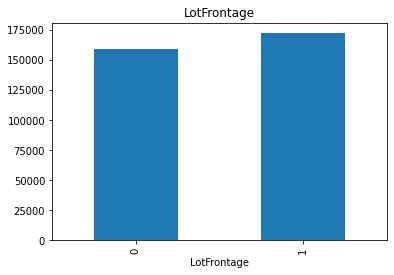

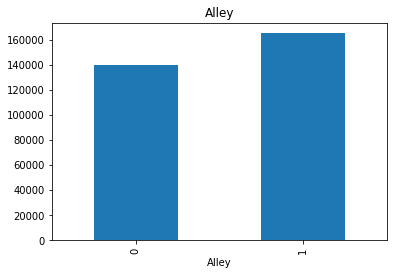

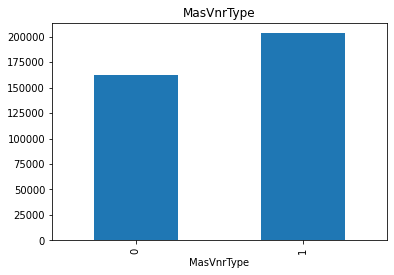

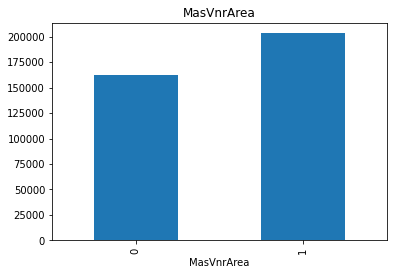

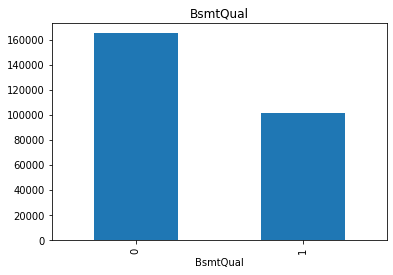

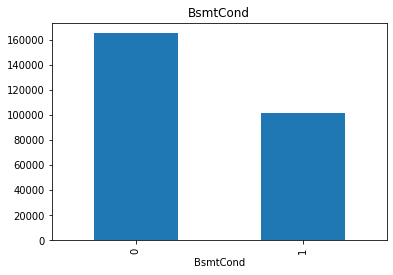

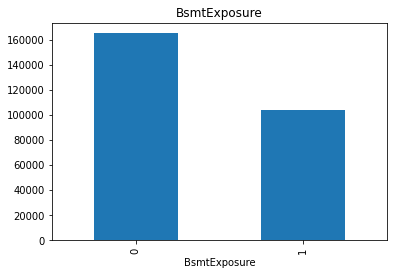

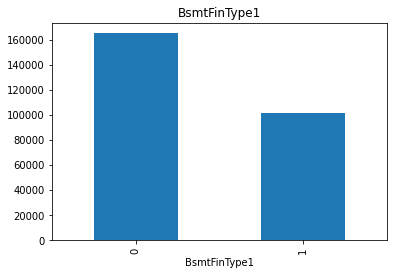

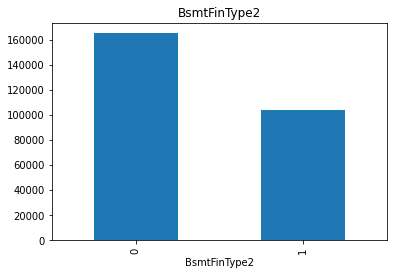

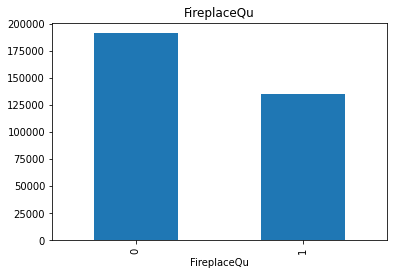

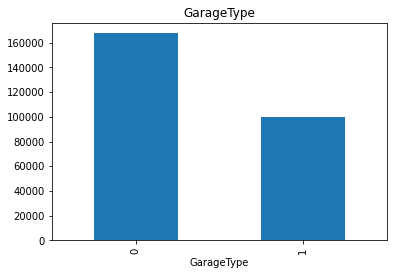

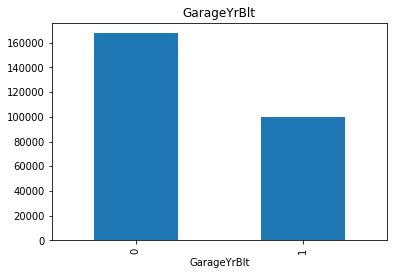

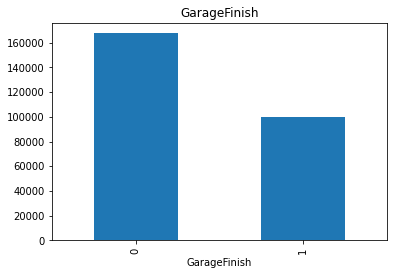

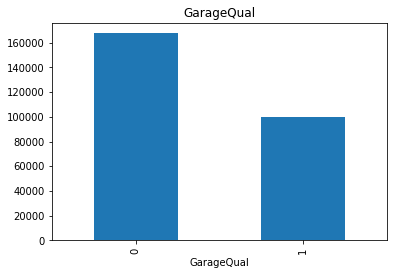

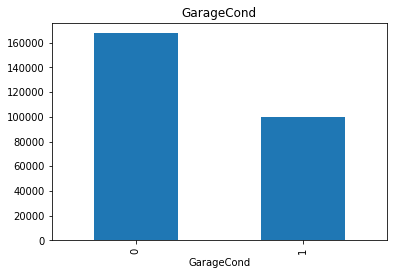

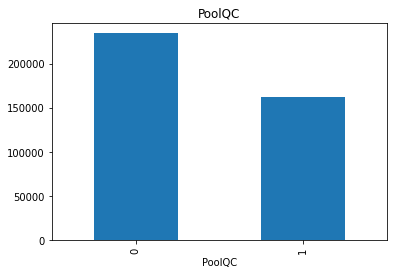

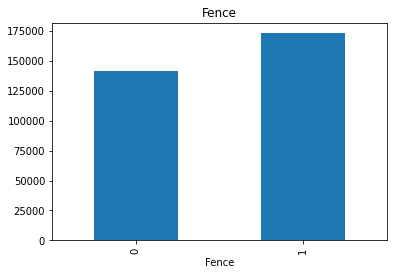

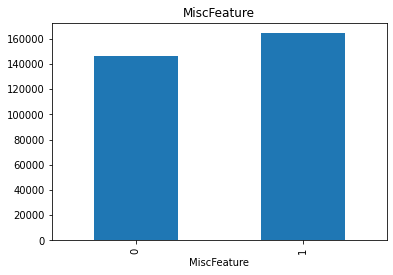

In [ ]:
for feature in features_with_na:
  data = df1.copy()
  data[feature] = np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

##Above observation, With records (1) that have null values, the median of the salesprice has also increased. It means that most of these features are influencing salesproce and we will need to convert missing values into something meaningful

##Numerical variables

In [ ]:
numerical_features = [ feature for feature in df1.columns if df1[feature].dtypes !='O']
print ("number of numerical features is {}".format(len(numerical_features)))

df1[numerical_features].head()

number of numerical features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_features 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'house price vs yer sold')

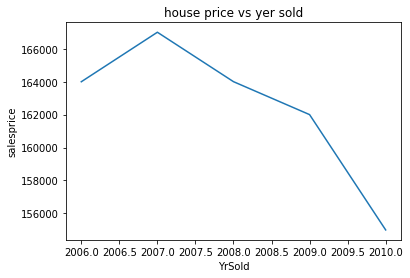

In [ ]:
df1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('salesprice')
plt.title('house price vs yer sold')

##The above graph shows that salesprice decrease with recently sold which cannot be true

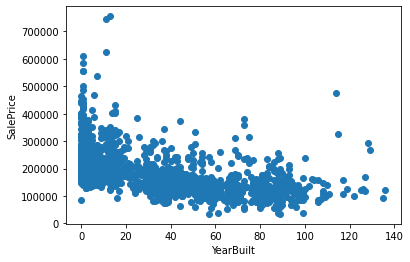

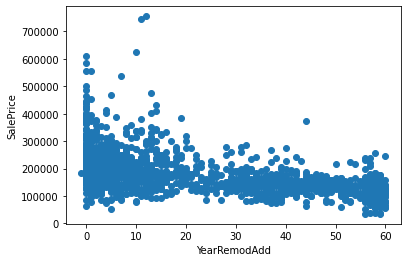

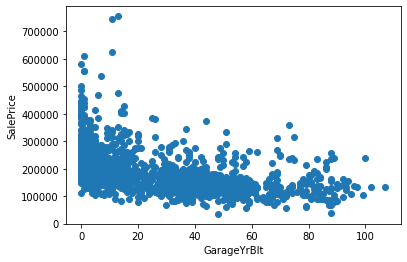

In [ ]:
for feature in year_features:
  if feature != 'YrSold':
    data = df1.copy()
    data[feature] = data['YrSold'] - data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

##From above observation, the price decreases with older houses 

In [ ]:
discrete_features = [feature for feature in numerical_features if len(df1[feature].unique())<25 and feature not in year_features+['Id']]
print("Discrete features are {}".format(len(discrete_features)))
discrete_features

Discrete features are 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
df1[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


##Find relation between discrete features and salesprice

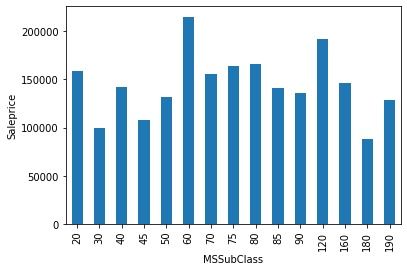

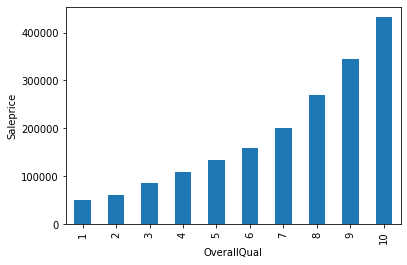

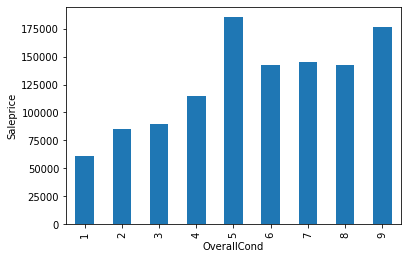

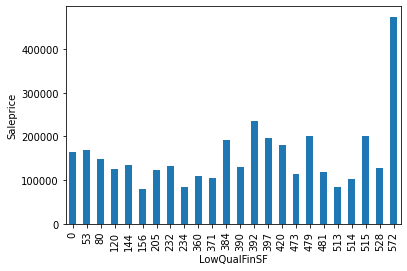

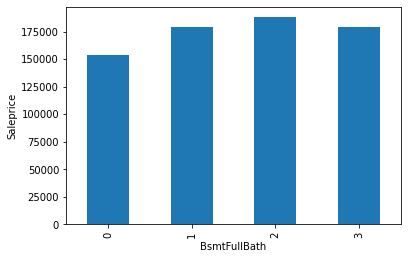

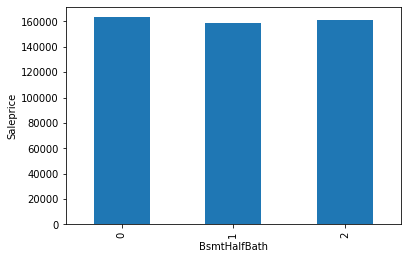

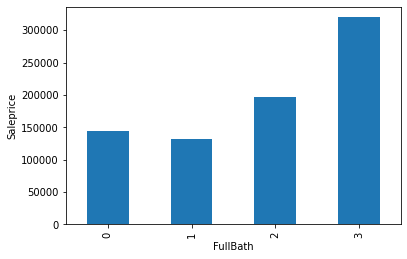

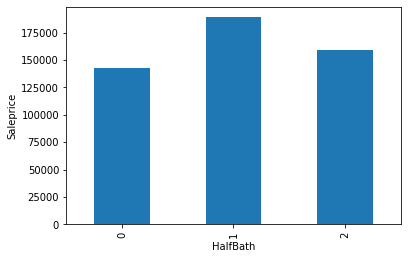

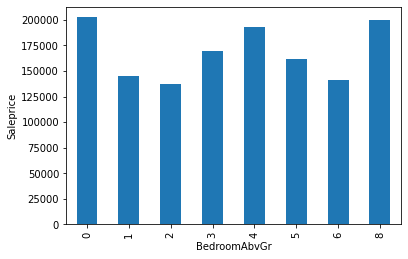

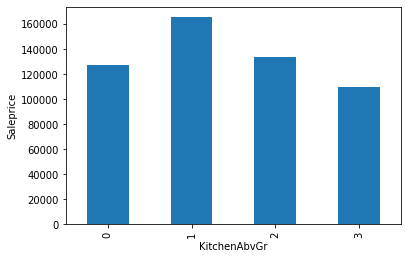

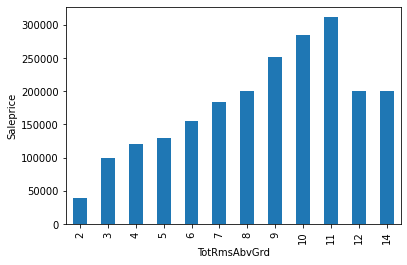

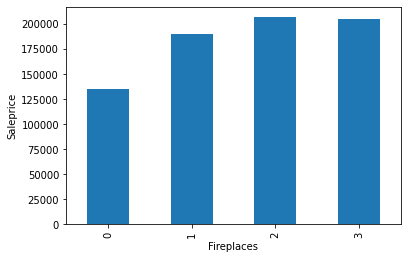

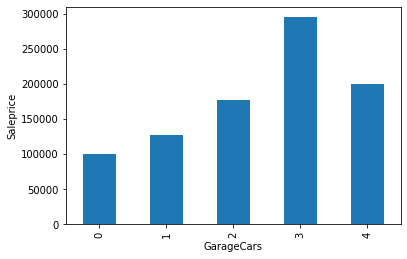

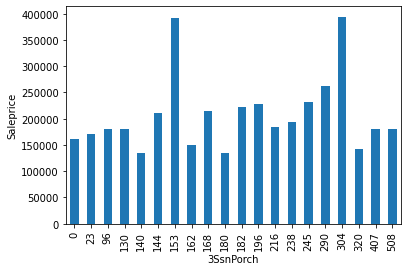

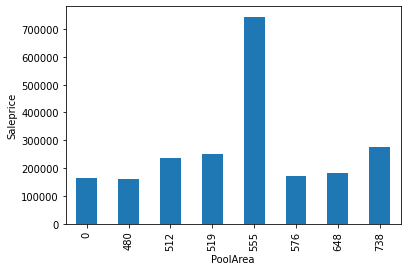

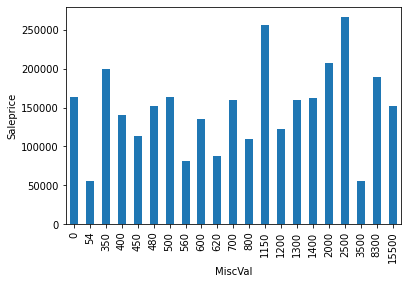

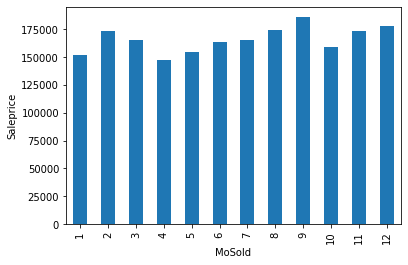

In [ ]:
for feature in discrete_features:
  data = df1.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Saleprice')
  plt.show()

##Continuous variables

In [ ]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]
print(len(continuous_features))
continuous_features


16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

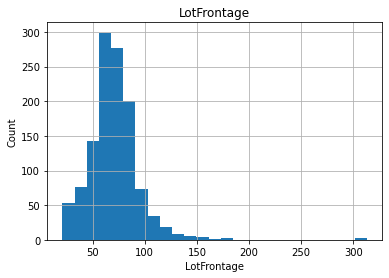

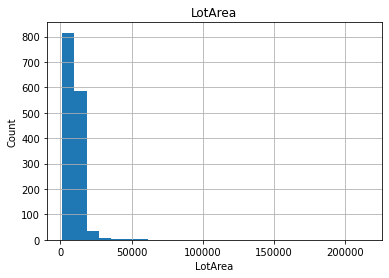

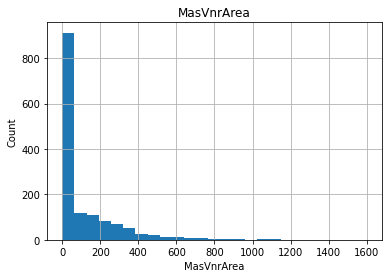

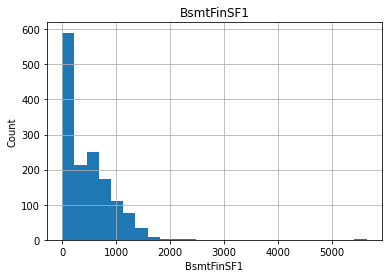

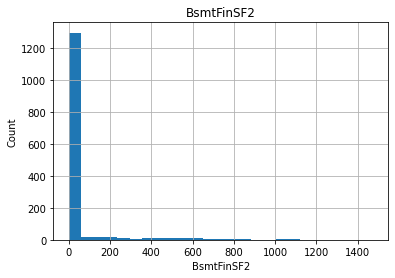

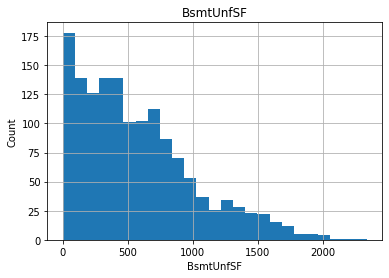

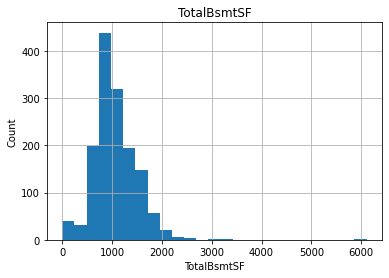

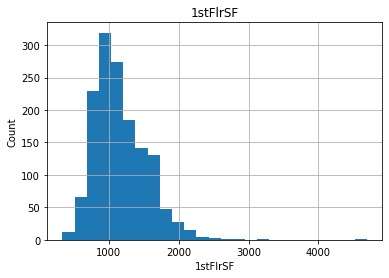

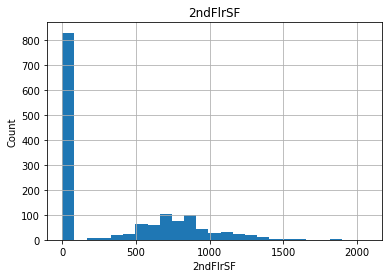

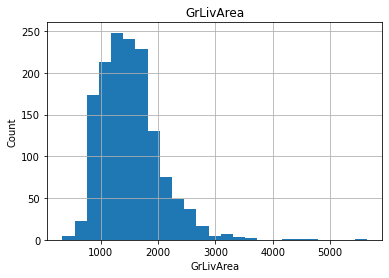

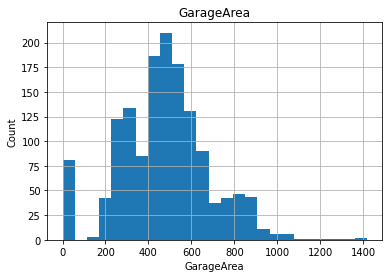

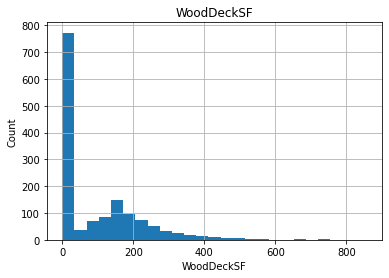

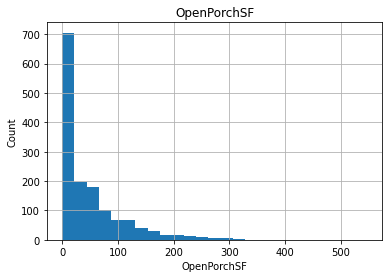

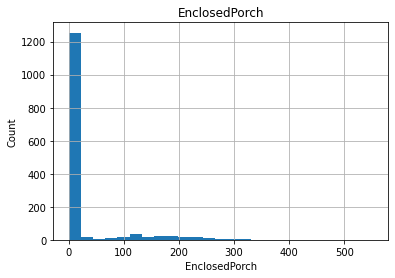

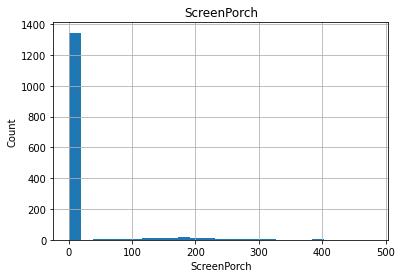

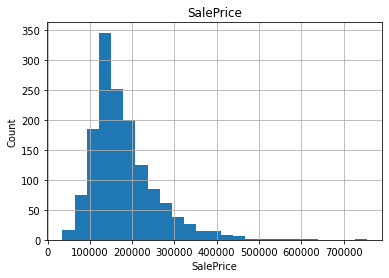

In [ ]:
for feature in continuous_features:
  data = df1.copy()
  data[feature].hist(bins=25)

  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

#Scaling methods implemented below

##The above distributions look skewed part from one that has gaussian distribution of data. Applying logarithmic transformation to normalize post which we see a monotonous distribution.

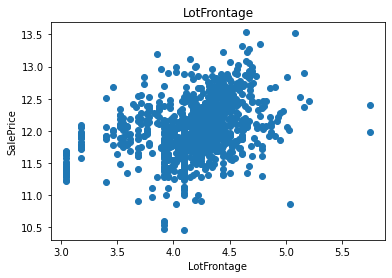

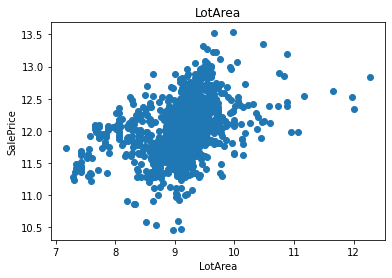

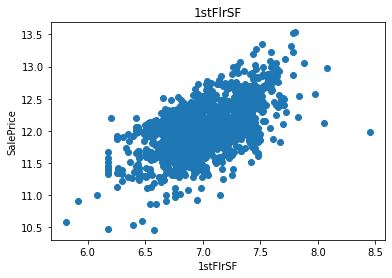

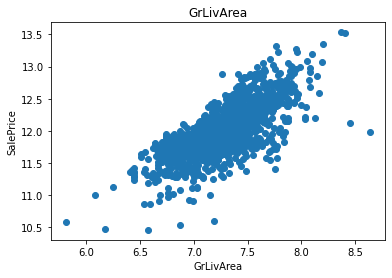

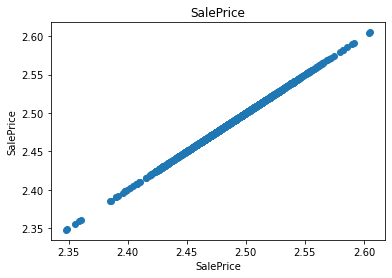

In [ ]:
for feature in continuous_features:
  data = df1.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()




Use Scaling to a range to check if it distributes data uniformly

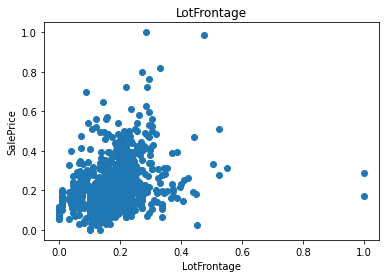

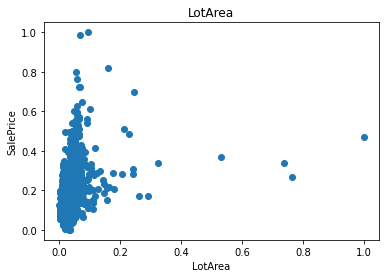

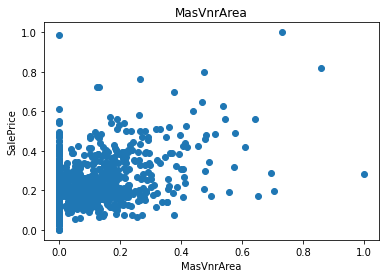

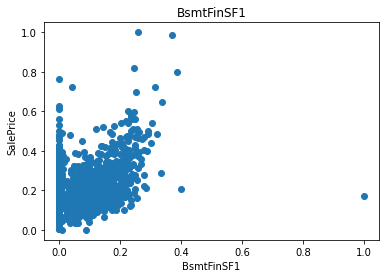

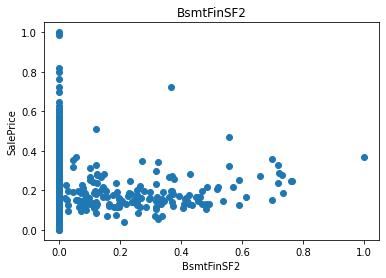

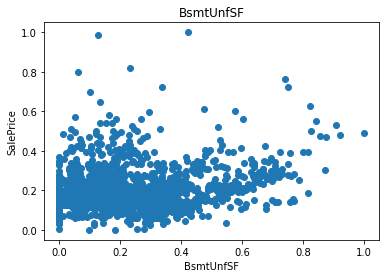

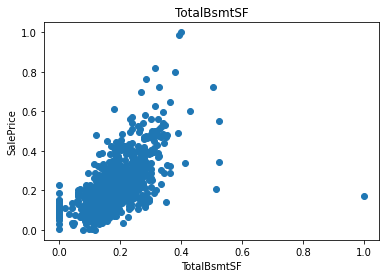

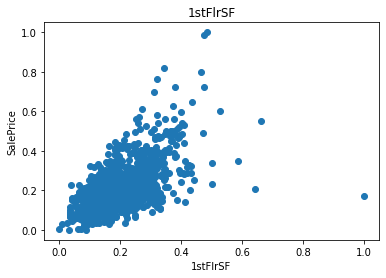

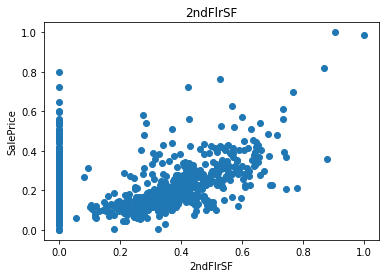

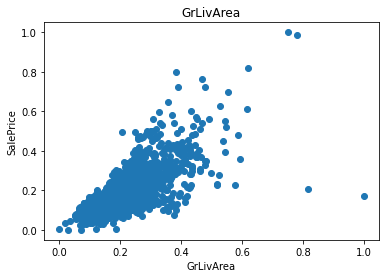

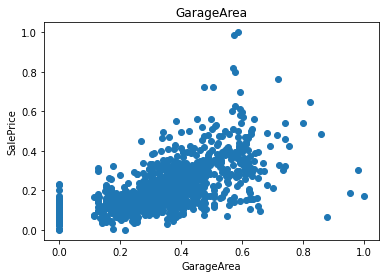

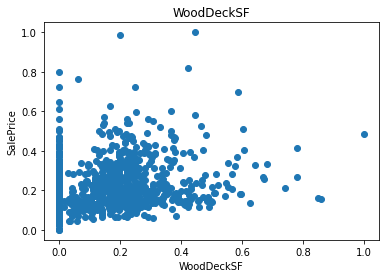

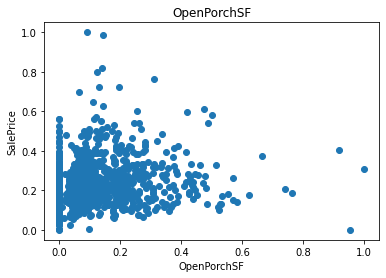

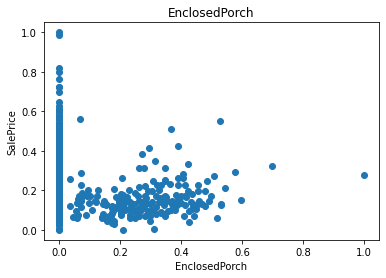

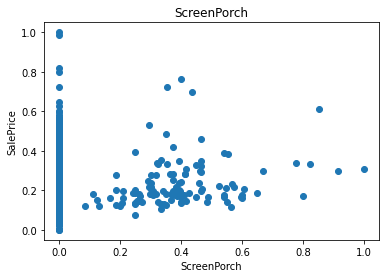

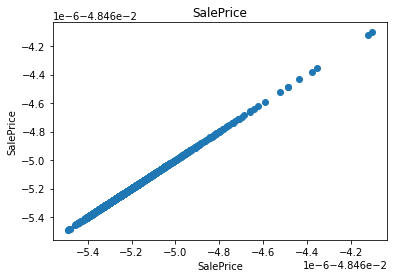

In [ ]:
sales_min = df1['SalePrice'].min(skipna = True)
sales_max = df1['SalePrice'].max(skipna = True)
for feature in continuous_features:
  data = df1.copy()
  feature_min = data[feature].min(skipna = True)
  feature_max = data[feature].max(skipna = True)
  data[feature] = (data[feature] - feature_min)/(feature_max-feature_min)
  data['SalePrice'] = (data['SalePrice'] - sales_min)/(sales_max - sales_min)
  plt.scatter(data[feature],data['SalePrice'])
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()


##Not all features are not in monotonous distribution after scaling to a range, It is because of the outliers present in each of these features.

##Applying z-score scaling on continuous features

In [ ]:
sales_mean = df1['SalePrice'].mean()
sales_std = df1['SalePrice'].std()
for feature in continuous_features:
  data = df1.copy()
  feature_mean = df1[feature].mean()
  feature_std = df1[feature].std()
  data[feature] = (data[feature]-feature_mean)/feature_std
  data['SalePrice'] = (data['SalePrice']-sales_mean)/sales_std
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

##Find the outliers in continuous features

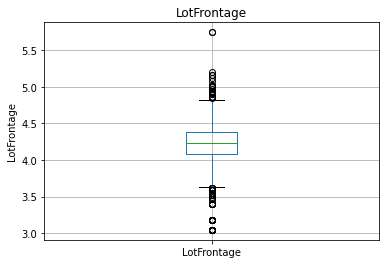

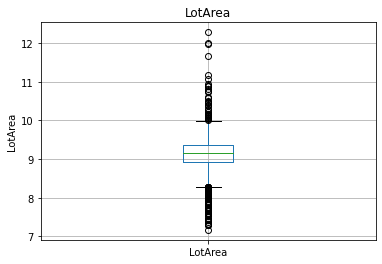

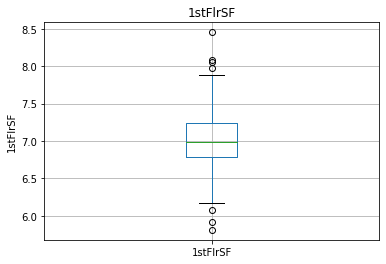

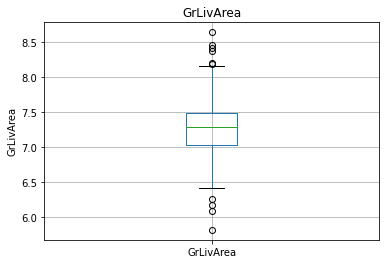

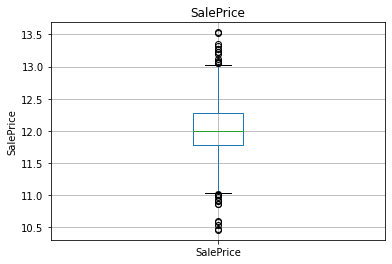

In [ ]:
for feature in continuous_features:
  data = df1.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


##categorical features

In [ ]:
cat_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']
print(len(cat_features))
cat_features

##Find unique categories in each feature

In [ ]:
for feature in cat_features:
  print("The feature {} has {} different categories".format(feature,len(df1[feature].unique())))

Find the relationship between categorical features and dependent feature SalePrice

In [ ]:
for feature in cat_features:
  data = df1.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

#Handle Missing Data using best data imputation technique for our dataset

###categorical features

In [ ]:
cat_features_nan = [feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes == 'O']
cat_features_nan
for feature in cat_features_nan:
  print("{} has {}% values missing".format(feature,np.round(df1[feature].isnull().mean(),4)))

Handle the missing values in categorical features by replacing nans with a new category called 'missing'

In [ ]:
def replace_cat_nans(dataset,cat_features):
  data = df1.copy()
  data[cat_features] = data[cat_features].fillna('missing')
  return data
data = replace_cat_nans(df1,cat_features_nan)
data[cat_features_nan].isnull().sum()


###Handle missing values in numerical features, From above EDA we know that, there are many outliers in numerical features so computing a mean would disturb the distribution, instead we fill in with median / mode

In [ ]:
numerical_nan = [feature for feature in df1.columns if df1[feature].isnull().sum()>1 and df1[feature].dtypes !='O']
numerical_nan
for feature in numerical_nan:
  print("{} feature has {}% missing values".format(feature,np.round(df1[feature].isnull().mean(),4)))

LotFrontage feature has 0.1774% missing values
MasVnrArea feature has 0.0055% missing values
GarageYrBlt feature has 0.0555% missing values


###creating another column just to have a record that the missing value for that row in this column was imputed using median of that column

In [ ]:
dataset = df1[['LotFrontage','MasVnrArea','GarageYrBlt']].copy()

for feature in numerical_nan:
  median_val = df1[feature].median()
  df1[feature +'NaN'] = np.where(df1[feature].isnull(),1,0)
  df1[feature].fillna(median_val,inplace=True)
 

df1[numerical_nan].isnull().sum()

#df1['LotFrontage','MasVnrArea','GarageYrBlt'].head()
dataset.head()


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


##Using MICE algorithm for multivariate imputation (Make educated guess to fill in the values by looking at other data samples) using gradient booster regressor. However, I am not using MICE to impute values in my dataset.

In [ ]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)

def mice_imputation_numeric(dataset):
    numeric_imputer = IterativeImputer(GradientBoostingRegressor())
    numeric_imputed = numeric_imputer.fit_transform(dataset)
    return numeric_imputed
    print(type(numeric_imputed))
numeric_imputed_pd = mice_imputation_numeric(dataset)


In [ ]:
print(numeric_imputed_pd)

[[  65.  196. 2003.]
 [  80.    0. 1976.]
 [  68.  162. 2001.]
 ...
 [  66.    0. 1941.]
 [  68.    0. 1950.]
 [  75.    0. 1965.]]


##Applying logscaling on numerical features

In [ ]:
num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
for feature in num_features:
  df1[feature] = np.log(df1[feature])
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216,0,0,0


##Yearsold was not showing sensible increase/decrease in saleprice. As year built might be different and we cant compare just the saleprice and year sold without considering the yr built.

In [ ]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  df1[feature] = df1['YrSold'] - df1[feature]
df1[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


##Make bins of years by 10 years using binning

In [ ]:
bins =  [1800] + [i for i in range(1900, 2020, 10)]
bins

[1800, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [ ]:
def binning(df, col, bins, test=None):
    df[col] = df[col].astype(int)
    binned_values = list()
    for ind, i in enumerate(df[col]):
        for j, k in enumerate(bins):
            if i <= k and i!= 1800:
                binned_values.append('{}-{}'.format(bins[j-1], k))
                if col == 'GarageYrBlt' and ind==1458 and test!= None:
                    binned_values.append('{}-{}'.format(bins[j-1], k))
                    
                    
                break
            if i <= k and i == 1800:
                binned_values.append('{}'.format(k))
                break
    df[col] = binned_values
    return df

In [ ]:
yr_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold', 'YearRemodAdd']

for col in yr_cols:
    binning(df1, col, bins)


In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2010-1800,2010-1800,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2010-1800,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2000-2010,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,2010-1800,2010-1800,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,2010-1800,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2000-2010,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2010-1800,2010-1800,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2010-1800,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2000-2010,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,2010-1800,2010-1800,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,2010-1800,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2000-2010,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2010-1800,2010-1800,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2010-1800,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2000-2010,WD,Normal,12.429216,0,0,0


##Handling rare categories - for categories in each categorical feature, if certain category is occuring less that 1/2 % , eliminate them as it doesn not influence the target much

In [ ]:
cat_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']
cat_features

In [ ]:
for feature in cat_features:
  temp = df1.groupby(feature)['SalePrice'].count()/len(df1)
  temp_df = temp[temp > 0.01].index
  df1[feature] = np.where(df1[feature].isin(temp_df),df1[feature],'rare_cat')
df1.head(100)

##Convert categorical to numerical variables

In [ ]:
for feature in cat_features:
    labels_ordered=df1.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df1[feature]=df1[feature].map(labels_ordered)

###Feature scaling for entire dataset using min max scaler

In [ ]:
features_scale = [feature for feature in df1.columns if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(df1[features_scale])

MinMaxScaler()

In [ ]:
scaler.transform(df1[features_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
data = pd.concat([df1[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df1[features_scale]),columns = features_scale)],axis=1)

In [ ]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.666667,0.25,1.000000,0.125089,0.8,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.75,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.666667,1.00,0.666667,0.173281,0.8,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.75,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.666667,0.50,1.000000,0.086109,0.8,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.75,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.000000,0.25,0.666667,0.038271,0.8,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.25,0.074766,0.333333,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.666667,0.75,1.000000,0.116052,0.8,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.75,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.666667,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
data.to_csv('fe.csv',index=False)

##Feature subset selection for the accuracy of the model using embedded methods algorithm and also performing filter method- chi squared test and correlation coefficient scores against target vairable to check if variable can be elminated. Select smaller alpha value for lasso, bigger alpha value eliminates more features

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
y_train = df1['SalePrice']
x_train = df1.drop(['Id','SalePrice'],axis = 1)

feature_selection_model = SelectFromModel(Lasso(alpha = 0.005,random_state = 0))
feature_selection_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

##True are those features which are impotant anf False are the ones that can be eliminated. These features are individually 

In [ ]:
feature_selection_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False])

##getting these features that are true/false according to lasso - needed/not needed

In [ ]:
selected_features = x_train.columns[(feature_selection_model.get_support())]
print("total features {}".format(x_train.shape[1]))
print("selected features {}".format(len(selected_features)))
print("features with least coefficient, not needed {}".format(np.sum(feature_selection_model.estimator_.coef_ == 0)))


total features 82
selected features 39
features with least coefficient, not needed 41


In [ ]:
selected_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

##Feature selection using pearson

In [ ]:
from scipy import stats
r_=[]
for feature in numerical_nan:
  r = stats.pearsonr(df1[feature], df1['SalePrice'])
  r_.append(r)
r_


[(0.33477085313976, 1.4469846007067933e-39),
 (0.4726144990045738, 4.100461044539401e-82),
 (0.46675365236333954, 7.155699874024808e-80)]

##Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

In [ ]:

#pca_data = pd.DataFrame(df1[features_scale],columns = features_scale)

pca.fit(data)
tr_pca = pca.transform(data)

In [ ]:
data.shape

(1460, 84)

In [ ]:
tr_pca.shape

(1460, 8)

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(tr_pca[:,0],tr_pca[:,1],c = data['SalePrice'])
plt.xlabel("First component PCA")
plt.ylabel("Second component PCA")

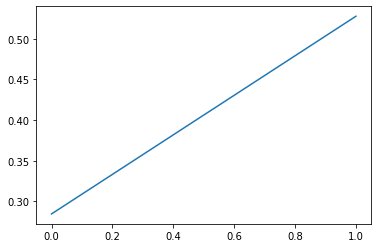

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [ ]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = pca_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,729.500019,-0.823648,0.570888,-0.254905,-0.104106,-0.252118,0.354100,0.046996
1,728.500004,0.013826,-0.389643,-0.024421,-0.073338,-0.047695,-0.639558,0.058501
2,727.500019,-0.987422,0.379182,-0.124791,0.074657,-0.257262,0.130090,-0.013549
3,726.499992,0.397492,-0.317532,0.015022,0.257656,-0.494959,-0.315415,-0.174718
4,725.500017,-1.278008,0.218938,-0.030915,0.284392,-0.229723,0.042579,-0.033365
